<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/Ensemble_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_wine

# Load the wine dataset
# Alternatively, replace with: pd.read_csv('wine.csv') if using a CSV file
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))

# Ensemble using VotingClassifier (soft voting since SVM is probabilistic)
# Ensemble using DT, RF, and SVM
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt),
    ('random_forest', rf),
    ('svm', svm)
], voting='soft')

# 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')

# Results
print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))


Cross-validation Accuracy Scores: [1.         0.88888889 0.94444444 1.         0.94444444 0.88888889
 1.         0.83333333 1.         1.        ]
Mean Accuracy: 95.00%


Decision Tree Accuracy: 0.8997 ± 0.0776
Random Forest Accuracy: 0.9889 ± 0.0222
SVM Accuracy: 0.9778 ± 0.0369
Ensemble Accuracy: 0.9500 ± 0.0580


<ipython-input-9-1581219f9bec>:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


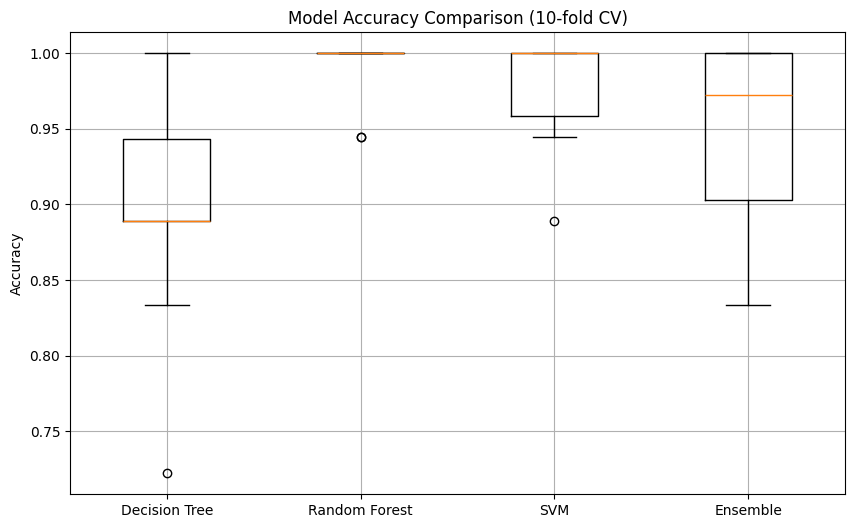

In [9]:
# Import libraries
# In this case, we intend to see the performance of each model and compare to RF
# Recall that RF is an ensemble model itself. It is interesting if we have
# produce an ensemble model using another ensemble model.
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# Load the dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))
ensemble = VotingClassifier(estimators=[
    ('decision_tree', dt),
    ('random_forest', rf),
    ('svm', svm)
], voting='soft')

# Store models in a dictionary
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Ensemble": ensemble
}

# Evaluate each model
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[name] = scores
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title("Model Accuracy Comparison (10-fold CV)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Random Forest Accuracy:  0.9889 ± 0.0222
Ensemble Accuracy:       0.9500 ± 0.0580

Paired t-test: t-stat = -2.6888, p-value = 0.0248
Wilcoxon signed-rank test: W = 0.0, p-value = 0.0394


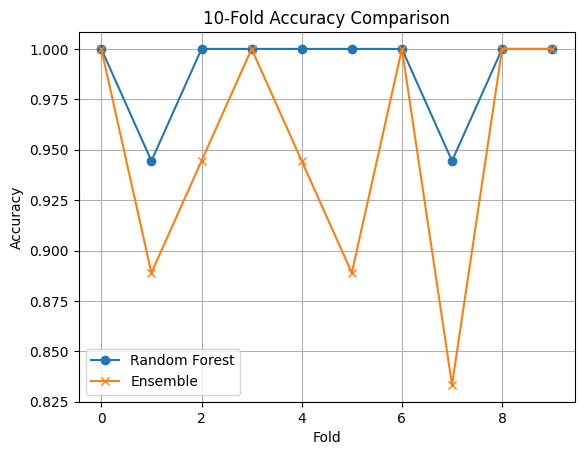

In [10]:
# Import Libraries
# Ensemble model using other models apart from the RF
# Compare with RF
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))

# Ensemble
ensemble = VotingClassifier(estimators=[
    ('dt', dt),
    ('rf', rf),
    ('svm', svm)
], voting='soft')

# Get cross-val scores
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
ensemble_scores = cross_val_score(ensemble, X, y, cv=cv, scoring='accuracy')

# Output accuracies
print("Random Forest Accuracy:  {:.4f} ± {:.4f}".format(rf_scores.mean(), rf_scores.std()))
print("Ensemble Accuracy:       {:.4f} ± {:.4f}".format(ensemble_scores.mean(), ensemble_scores.std()))

# Paired t-test
t_stat, p_val_ttest = ttest_rel(ensemble_scores, rf_scores)
print(f"\nPaired t-test: t-stat = {t_stat:.4f}, p-value = {p_val_ttest:.4f}")

# Wilcoxon test (non-parametric alternative)
try:
    w_stat, p_val_wilcoxon = wilcoxon(ensemble_scores, rf_scores)
    print(f"Wilcoxon signed-rank test: W = {w_stat}, p-value = {p_val_wilcoxon:.4f}")
except ValueError:
    print("Wilcoxon test not applicable (identical scores in one or more folds)")

# Optional: Visualize the fold-wise comparison
plt.plot(rf_scores, label="Random Forest", marker='o')
plt.plot(ensemble_scores, label="Ensemble", marker='x')
plt.title("10-Fold Accuracy Comparison")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Random Forest Accuracy:        0.9889 ± 0.0222
Ensemble (No RF) Accuracy:     0.9611 ± 0.0500

Paired t-test: t-stat = -2.2361, p-value = 0.0522
Wilcoxon signed-rank test: W = 0.0, p-value = 0.0588


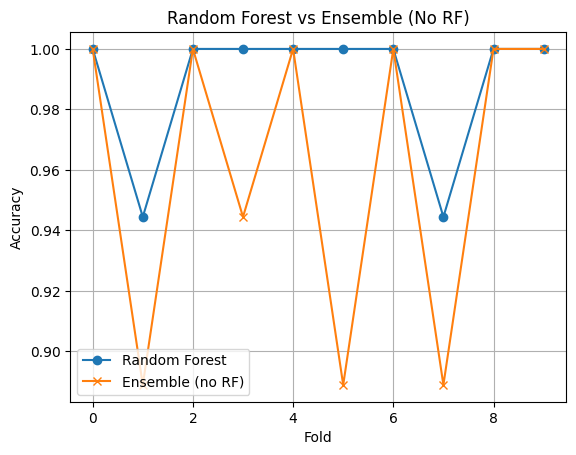

In [11]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# CV setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Base models
dt = DecisionTreeClassifier(random_state=42)
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# RF for comparison
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# New ensemble (no RF)
ensemble_no_rf = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')

# Cross-validation
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
ensemble_scores = cross_val_score(ensemble_no_rf, X, y, cv=cv, scoring='accuracy')

# Accuracy results
print("Random Forest Accuracy:        {:.4f} ± {:.4f}".format(rf_scores.mean(), rf_scores.std()))
print("Ensemble (No RF) Accuracy:     {:.4f} ± {:.4f}".format(ensemble_scores.mean(), ensemble_scores.std()))

# Statistical Tests
t_stat, p_val_ttest = ttest_rel(ensemble_scores, rf_scores)
print(f"\nPaired t-test: t-stat = {t_stat:.4f}, p-value = {p_val_ttest:.4f}")

try:
    w_stat, p_val_wilcoxon = wilcoxon(ensemble_scores, rf_scores)
    print(f"Wilcoxon signed-rank test: W = {w_stat}, p-value = {p_val_wilcoxon:.4f}")
except ValueError:
    print("Wilcoxon test not applicable (identical scores in one or more folds)")

# Plot comparison
plt.plot(rf_scores, label="Random Forest", marker='o')
plt.plot(ensemble_scores, label="Ensemble (no RF)", marker='x')
plt.title("Random Forest vs Ensemble (No RF)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Random Forest Accuracy:              0.9889 ± 0.0222
Ensemble (GB + NB + SVM) Accuracy:   0.9889 ± 0.0333

Paired t-test: t-stat = 0.0000, p-value = 1.0000
Wilcoxon signed-rank test: W = 1.5, p-value = 1.0000


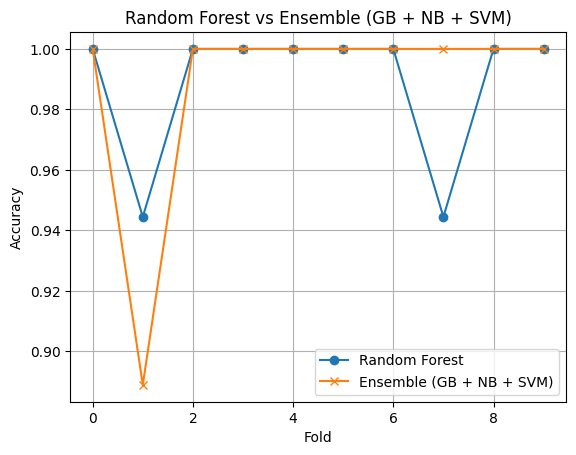

In [12]:
# An alternative ensembling might be with Gradient Boosting + Naive Bayes + SVM
# Would it perform better than RF?
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Base models (excluding RF)
gb = GradientBoostingClassifier(random_state=42)
nb = GaussianNB()
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))

# RF for comparison
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# New ensemble with GB + NB + SVM
ensemble_gb_nb_svm = VotingClassifier(estimators=[
    ('gb', gb),
    ('nb', nb),
    ('svm', svm)
], voting='soft')

# Evaluate with 10-fold CV
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
ensemble_scores = cross_val_score(ensemble_gb_nb_svm, X, y, cv=cv, scoring='accuracy')

# Print results
print("Random Forest Accuracy:              {:.4f} ± {:.4f}".format(rf_scores.mean(), rf_scores.std()))
print("Ensemble (GB + NB + SVM) Accuracy:   {:.4f} ± {:.4f}".format(ensemble_scores.mean(), ensemble_scores.std()))

# Statistical tests
t_stat, p_val_ttest = ttest_rel(ensemble_scores, rf_scores)
print(f"\nPaired t-test: t-stat = {t_stat:.4f}, p-value = {p_val_ttest:.4f}")

try:
    w_stat, p_val_wilcoxon = wilcoxon(ensemble_scores, rf_scores)
    print(f"Wilcoxon signed-rank test: W = {w_stat}, p-value = {p_val_wilcoxon:.4f}")
except ValueError:
    print("Wilcoxon test not applicable (identical scores in one or more folds)")

# Plot results
plt.plot(rf_scores, label="Random Forest", marker='o')
plt.plot(ensemble_scores, label="Ensemble (GB + NB + SVM)", marker='x')
plt.title("Random Forest vs Ensemble (GB + NB + SVM)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Random Forest Accuracy:     0.9889 ± 0.0222
Stacking Ensemble Accuracy: 0.9889 ± 0.0333

Paired t-test: t-stat = 0.0000, p-value = 1.0000
Wilcoxon signed-rank test: W = 1.5, p-value = 1.0000


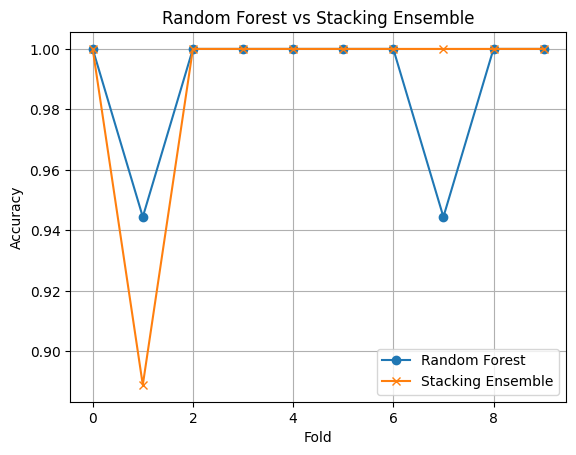

In [13]:
# In this experiment, we want to see if there is a model that could come close to RF
# Or even outperform it.
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Base models for stacking
base_models = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('nb', GaussianNB()),
    ('svm', make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42)))
]

# Meta-model
meta_model = LogisticRegression(max_iter=1000)

# Stacking ensemble
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Random Forest for comparison
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-val accuracy scores
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
stack_scores = cross_val_score(stacking, X, y, cv=cv, scoring='accuracy')

# Output results
print("Random Forest Accuracy:     {:.4f} ± {:.4f}".format(rf_scores.mean(), rf_scores.std()))
print("Stacking Ensemble Accuracy: {:.4f} ± {:.4f}".format(stack_scores.mean(), stack_scores.std()))

# Statistical tests
t_stat, p_val_t = ttest_rel(stack_scores, rf_scores)
print(f"\nPaired t-test: t-stat = {t_stat:.4f}, p-value = {p_val_t:.4f}")

try:
    w_stat, p_val_w = wilcoxon(stack_scores, rf_scores)
    print(f"Wilcoxon signed-rank test: W = {w_stat}, p-value = {p_val_w:.4f}")
except ValueError:
    print("Wilcoxon test not applicable (identical scores in one or more folds)")

# Plot comparison
plt.plot(rf_scores, label="Random Forest", marker='o')
plt.plot(stack_scores, label="Stacking Ensemble", marker='x')
plt.title("Random Forest vs Stacking Ensemble")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
